<a href="https://colab.research.google.com/github/akifkashif/Health-Insurance-Prediction--Capstone-Project/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [1]:
import numpy as np
import pandas as pd
from numpy import math

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [7]:
df.shape

(381109, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Text(0.5, 1.0, 'Response')

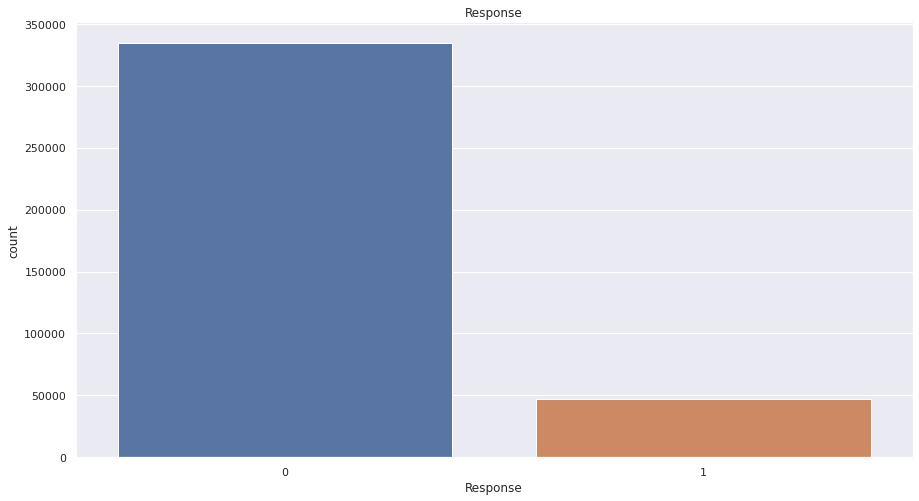

In [10]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Response'])
plt.title('Response')

***There are more number of people who don't prefer to purchase vehicle insurance***.

Text(0.5, 1.0, 'Gender')

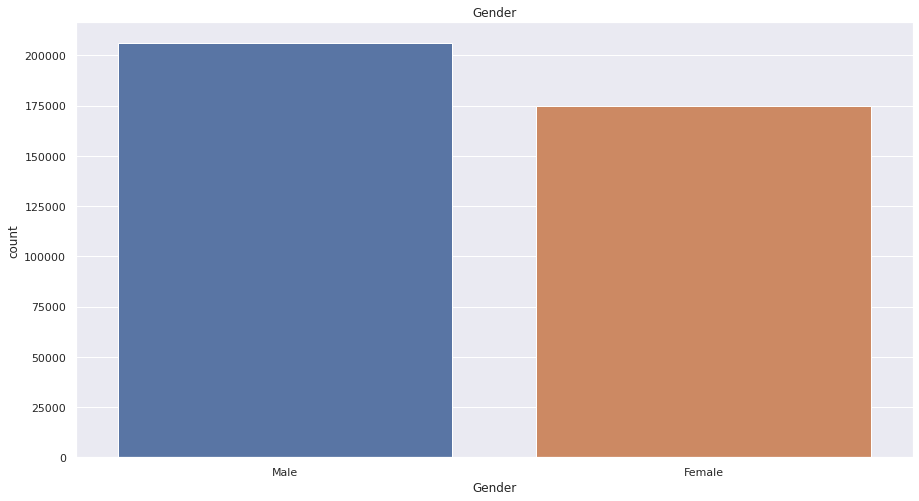

In [11]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Gender'])
plt.title('Gender')

In [12]:
df_gender =  df.groupby('Gender').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f141a8624f0>],
      dtype=object)

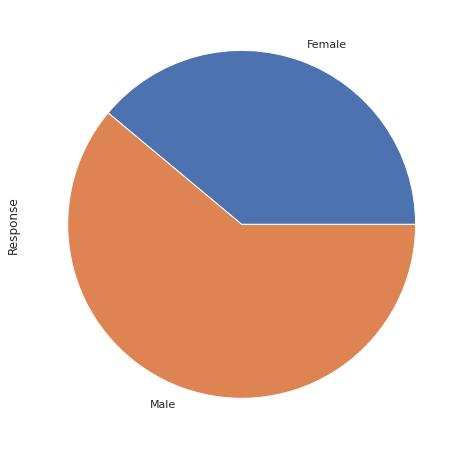

In [13]:
df_gender.plot(kind='pie', subplots=True, figsize=(8, 8))

***From the Pie charts we can conclude Males were more interested in subscribing to Vehicle Insurance***.

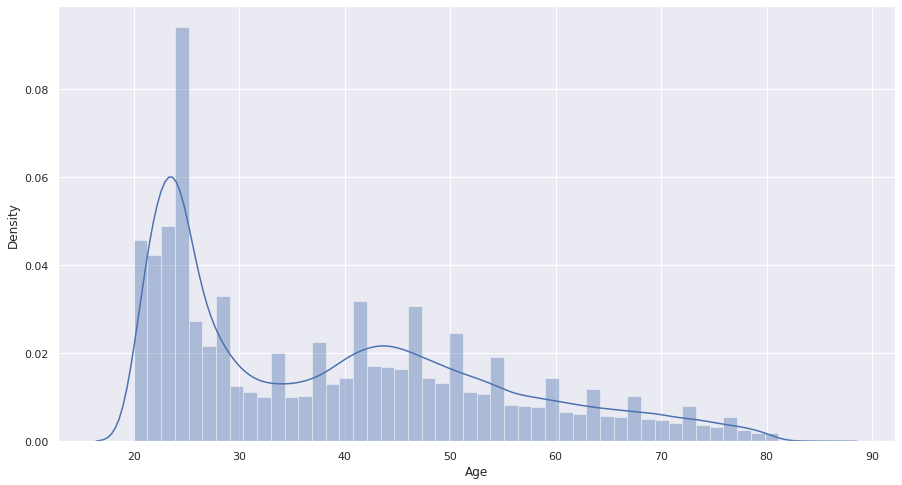

In [14]:
sns.distplot(df['Age'])

In [15]:
df_Age =  df.groupby('Age').sum()['Response']

In [16]:
df_Age

Age
20    171
21    574
22    763
23    892
24    913
     ... 
81      4
82      1
83      1
84      0
85      0
Name: Response, Length: 66, dtype: int64

In [17]:
# Categorizing Age feature
df['Age_Group'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

In [18]:
df_Age_Group =  df.groupby('Age_Group').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f141a754910>],
      dtype=object)

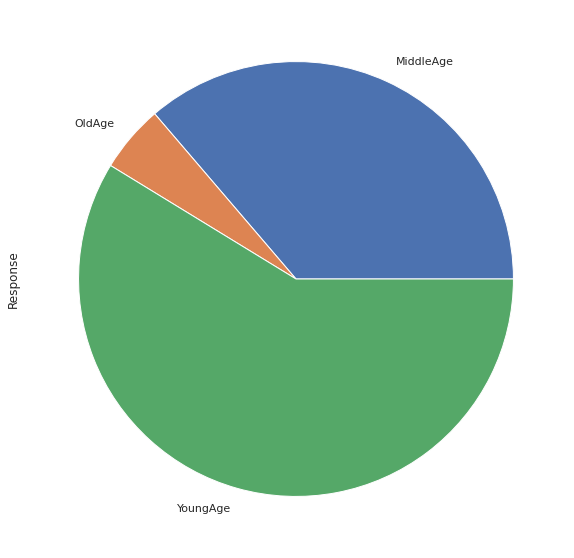

In [19]:
df_Age_Group.plot(kind='pie', subplots=True, figsize=(10, 10))

***From the plot it is evident that there is a remarkable response regarding Vehicle Insurance from Young Age group because they are more conscious about vehicle Insurance because of their reckless driving***.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417e781f0>],
      dtype=object)

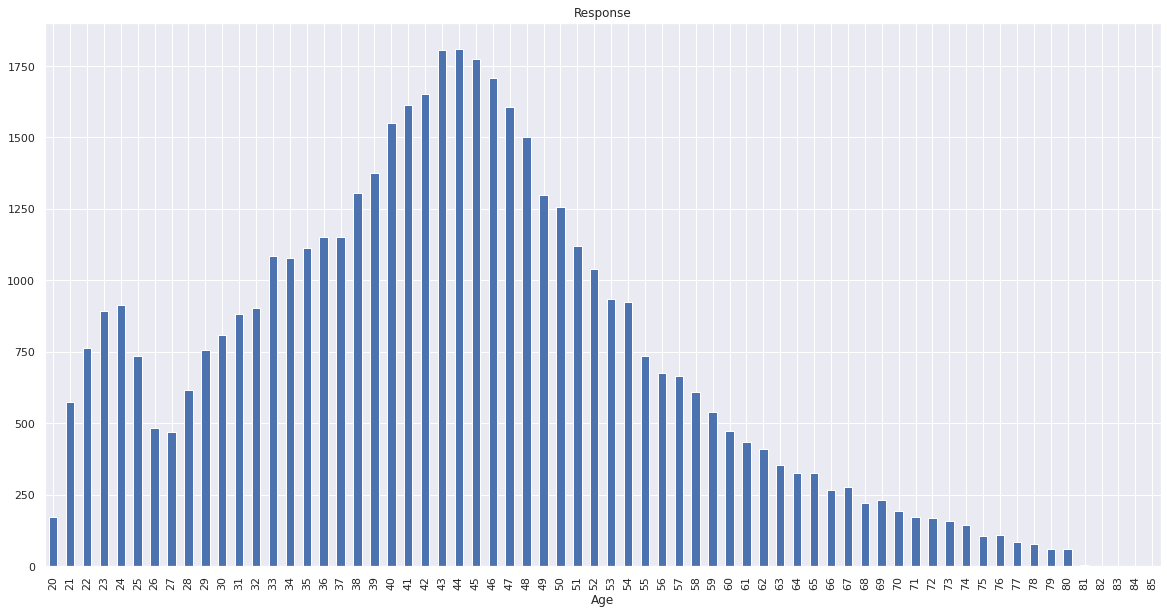

In [20]:
df_Age.plot(kind='bar', subplots=True, figsize=(20, 10))

***From the plot it is evident that there is a remarkable response regarding Vehicle Insurance from the Age groups 40 to 48***.

In [21]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [22]:
df['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [23]:
df_License =  df.groupby('Driving_License').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417d598e0>],
      dtype=object)

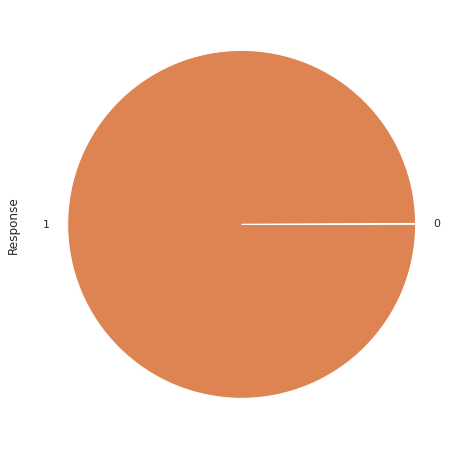

In [24]:
df_License.plot(kind='pie', subplots=True, figsize=(8, 8))

*People who posses driving license are more likely to get their vehicle insured than that of the people with no driving license*.

In [25]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [26]:
df_Previously_Insured =  df.groupby('Previously_Insured').sum()['Response']

In [27]:
df_Previously_Insured

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417cd2310>],
      dtype=object)

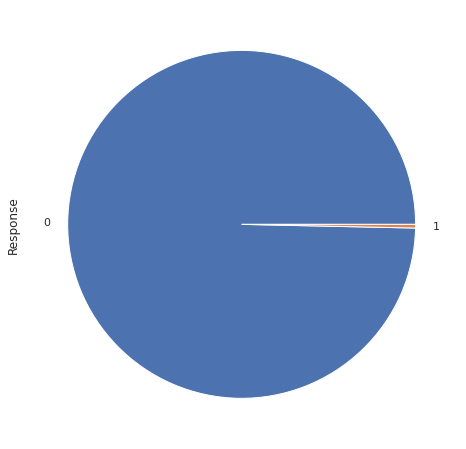

In [28]:
df_Previously_Insured.plot(kind='pie', subplots=True, figsize=(8, 8))

***This Pie Chart is about the distribution of number of responses by people who are previously insured and not insured. It suggests that people who are not previously insured almost always opt in for vehicle Insurance.***

In [29]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [30]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [31]:
df_Vehicle_Damage =  df.groupby('Vehicle_Damage').sum()['Response']

In [32]:
df_Vehicle_Damage

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417c8e100>],
      dtype=object)

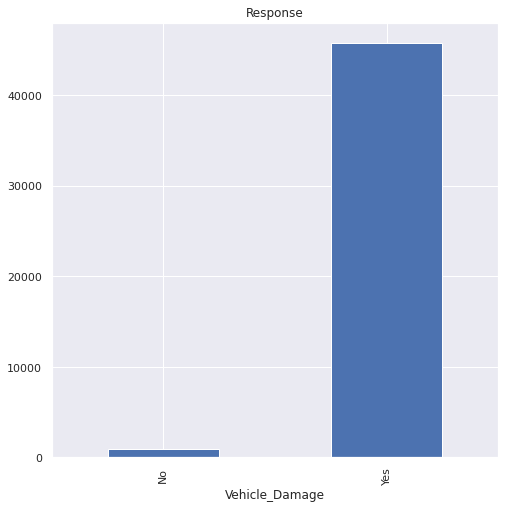

In [33]:
df_Vehicle_Damage.plot(kind='bar', subplots=True, figsize=(8, 8))

***From this plot, we can say that the people who have a damaged vehicle are more inclined to get a vehicle insurance***.

In [34]:
df['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

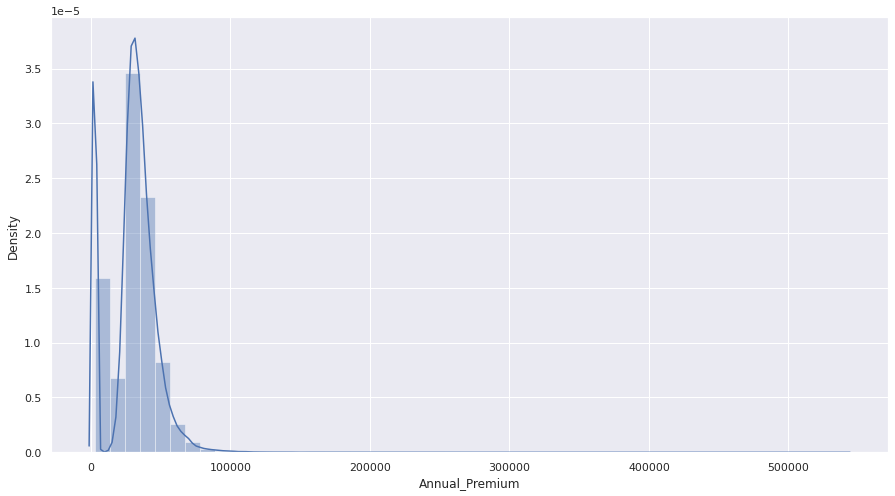

In [35]:
sns.distplot(df['Annual_Premium'])

In [36]:
df_Annual_Premium =  df.groupby('Annual_Premium').sum()['Response']

In [37]:
df_Annual_Premium

Annual_Premium
2630.0      8505
6098.0         0
7670.0         0
8739.0         0
9792.0         0
            ... 
472042.0       2
489663.0       1
495106.0       0
508073.0       0
540165.0       1
Name: Response, Length: 48838, dtype: int64

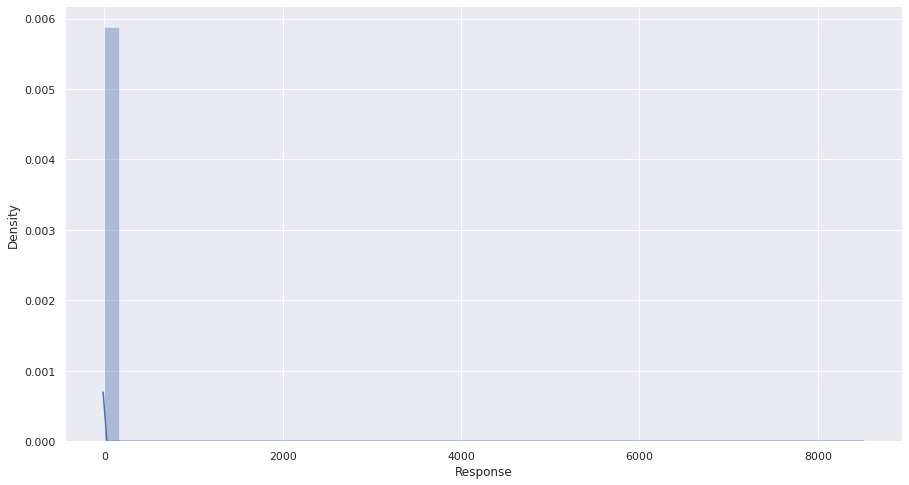

In [38]:
sns.distplot(df_Annual_Premium)

In [39]:
df_channels =  df.groupby('Policy_Sales_Channel').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417d5ffa0>],
      dtype=object)

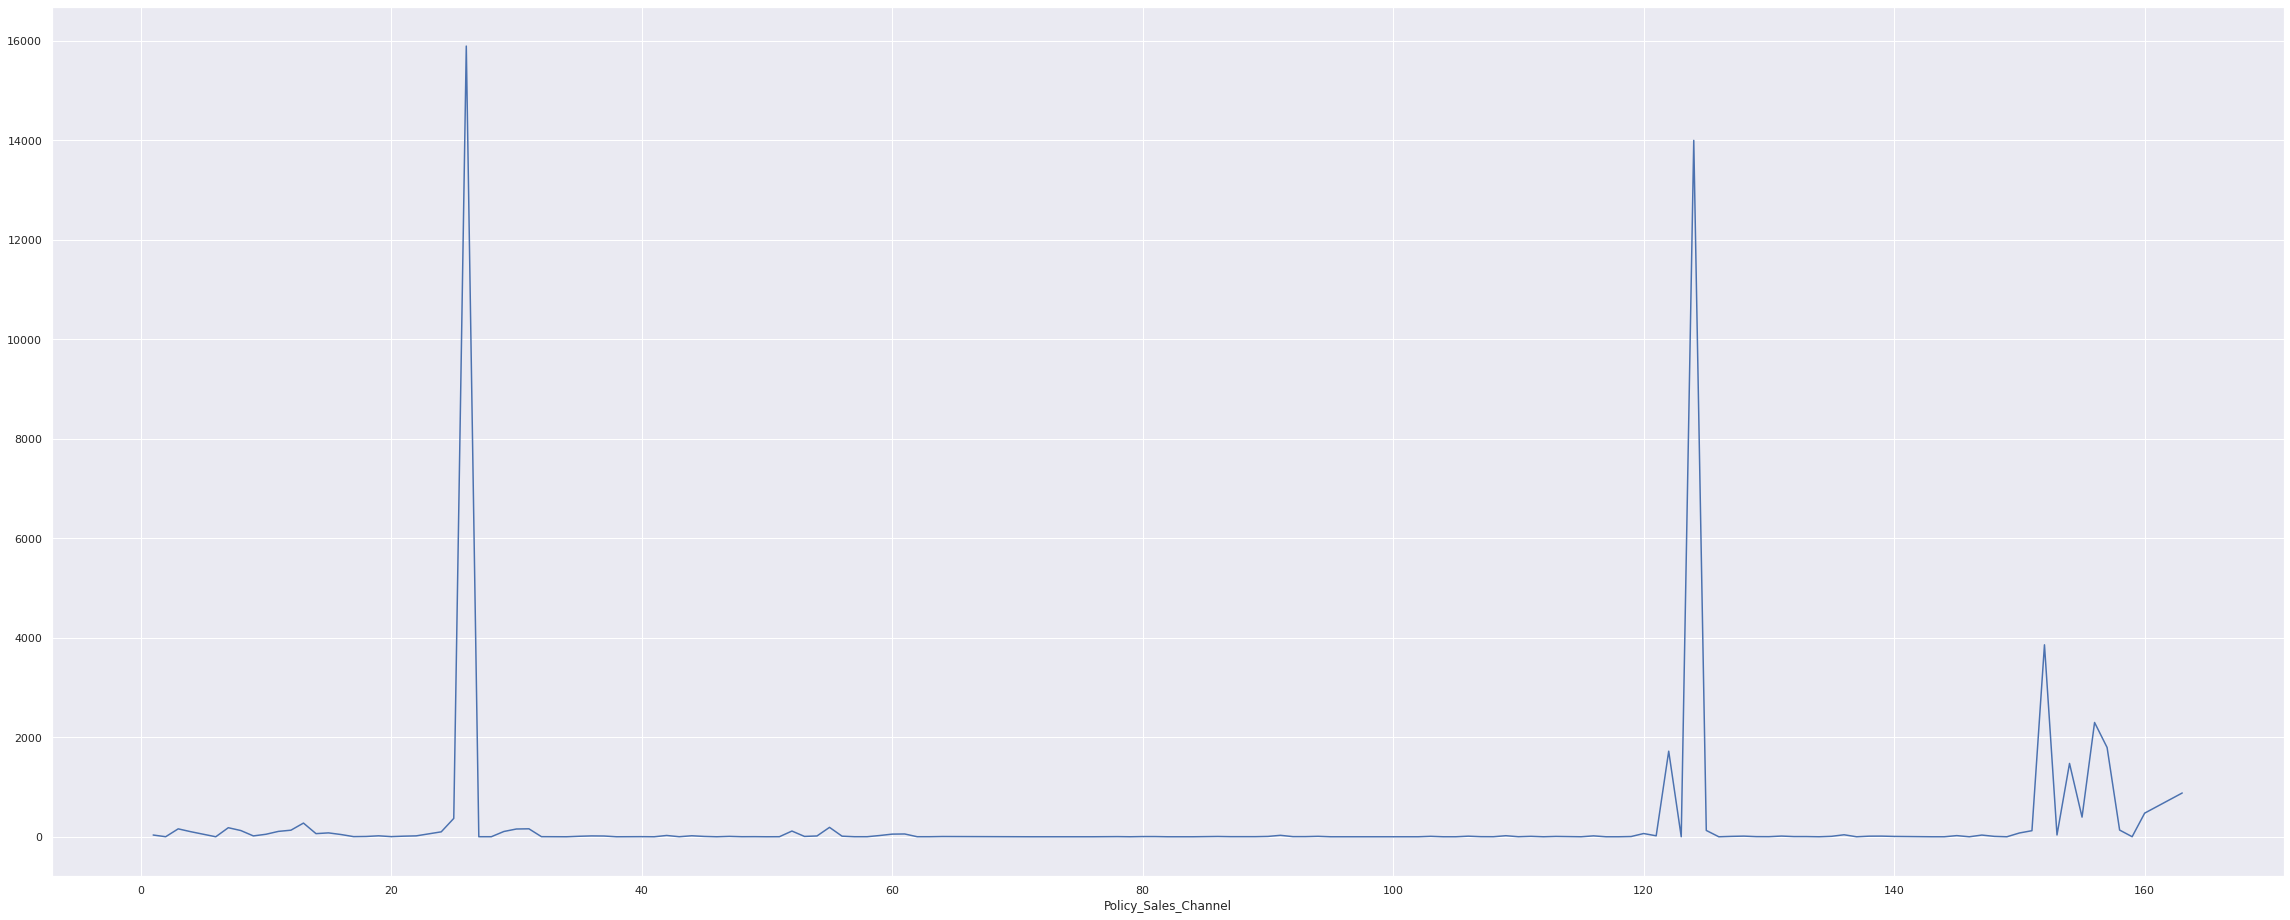

In [40]:
df_channels.plot(kind='line', subplots=True, figsize=(40, 16))

***From this line plots, it is clearly evident that the substanstial number of responses are from channels 26, 124 and 152 respectively***.

In [41]:
df['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [42]:
df_Vintage =  df.groupby('Vintage').sum()['Response']

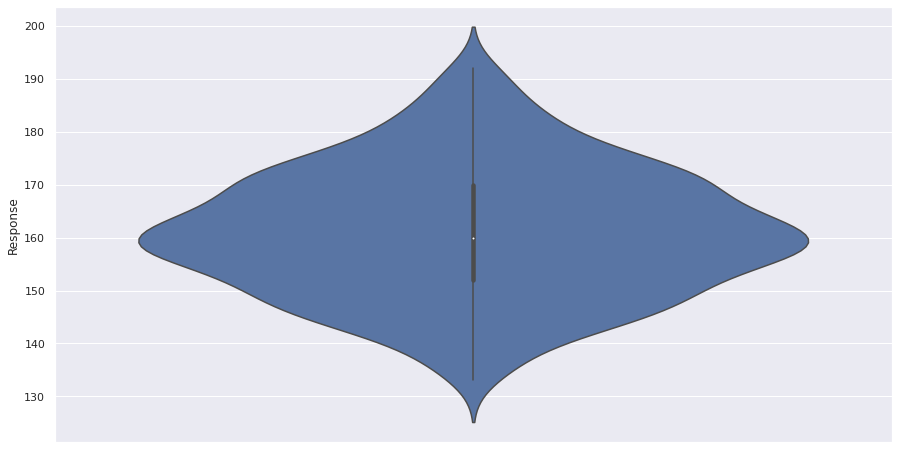

In [43]:
sns.violinplot(y=df_Vintage)

***This violinplot suggests that the poisitive responses are high from the customers who are loyal for 150 or more days and it drops after 180 days being a customer***.

In [44]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [47]:
df_Region_code =  df.groupby('Region_Code').sum()['Response']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1417aa8a00>],
      dtype=object)

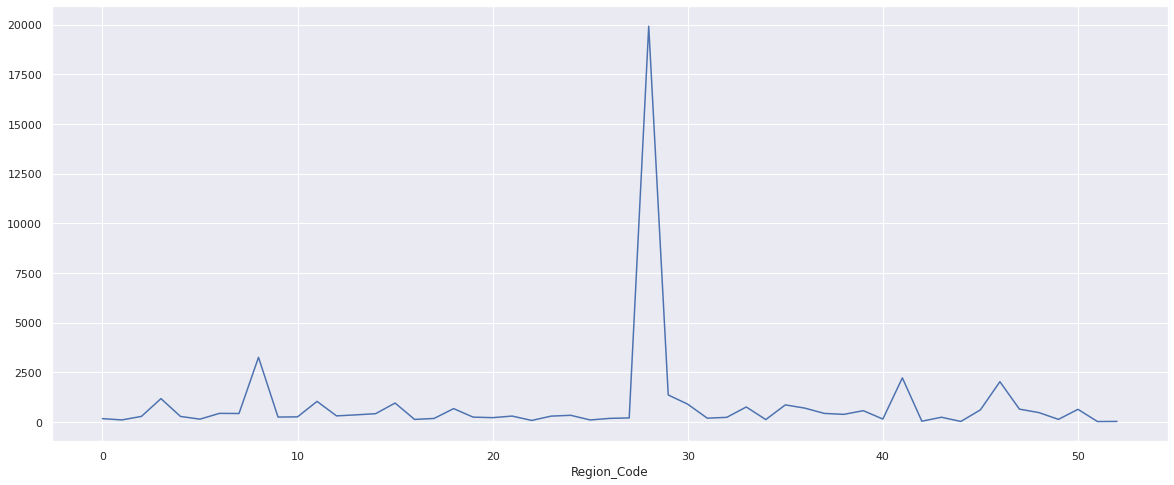

In [48]:
df_Region_code.plot(kind='line', subplots=True, figsize=(20, 8))

***This Line plot shows the positive responses from the customers across all the regions.There is substantial response from the Area code 28 followed by codes 8 and 46***.

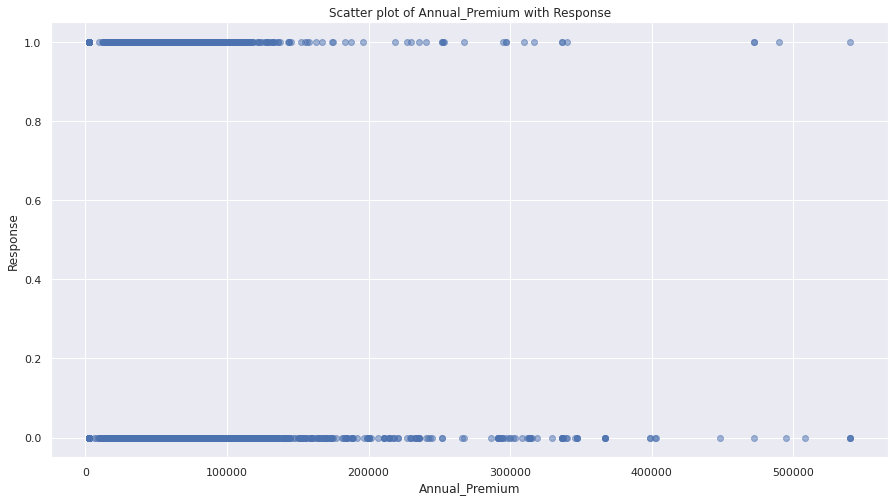

In [49]:
plt.scatter(df['Annual_Premium'], df['Response'], alpha=0.5)
plt.title('Scatter plot of Annual_Premium with Response')
plt.xlabel('Annual_Premium')
plt.ylabel('Response')
plt.show()

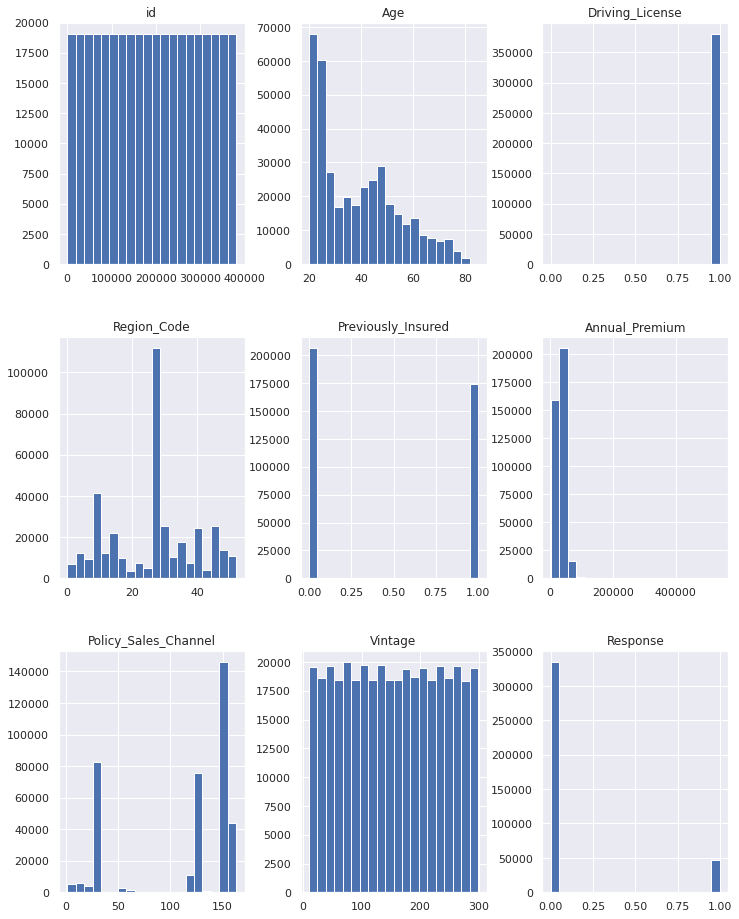

In [50]:
# Histogram of all the features to understand the distribution
df.hist(bins = 20 , figsize= (12,16)) ;

In [94]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [108]:
for col in ['Annual_Premium','Age','Vintage']:
  outliers = find_outliers_IQR(df[col])
  print(f"column name is {col}")
  print('number of outliers: '+ str(len(outliers)))

  print('max outlier value: '+ str(outliers.max()))

  print('min outlier value: '+ str(outliers.min()))
  
  outliers

column name is Annual_Premium
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Age
number of outliers: 0
max outlier value: nan
min outlier value: nan
column name is Vintage
number of outliers: 0
max outlier value: nan
min outlier value: nan


In [106]:
df=df[(df['Annual_Premium'] < 60090.0)]

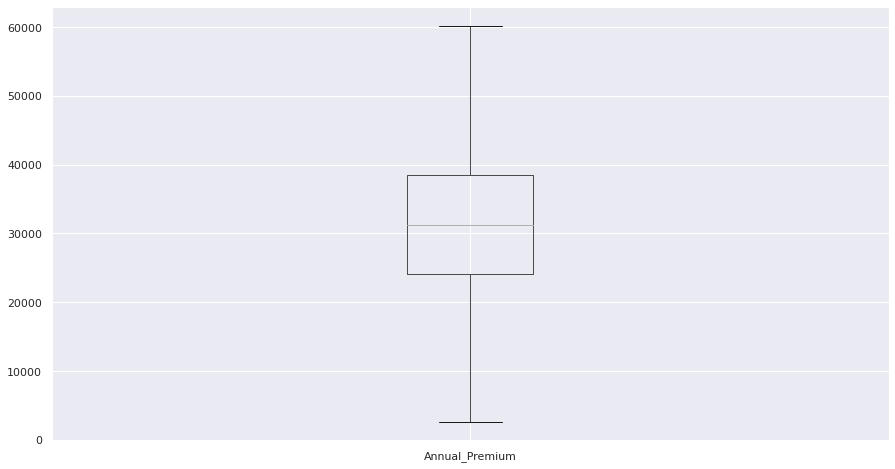

In [107]:
df.boxplot(column = (['Annual_Premium']))

In [109]:
# function to calculate Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [110]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.976814
1,Age,10.474226
2,Driving_License,38.888580
3,Region_Code,4.916094
4,Previously_Insured,1.992319
5,Annual_Premium,4.979677
6,Policy_Sales_Channel,7.857766
7,Vintage,4.374270


In [111]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [112]:
df1=df.copy()

In [113]:
df1 = pd.get_dummies(df1,drop_first=False)

In [114]:
df1.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_Group_MiddleAge,Age_Group_OldAge,Age_Group_YoungAge
0,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,0,0,1,0,1,0,0,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,0,1,1,0,0,1,0,0,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,0,1,0,0,1,0,1,1,0,0
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0,1,0,1,0,0,0,1
4,5,29,1,41.0,1,27496.0,152.0,39,0,1,0,0,1,0,1,0,0,0,1


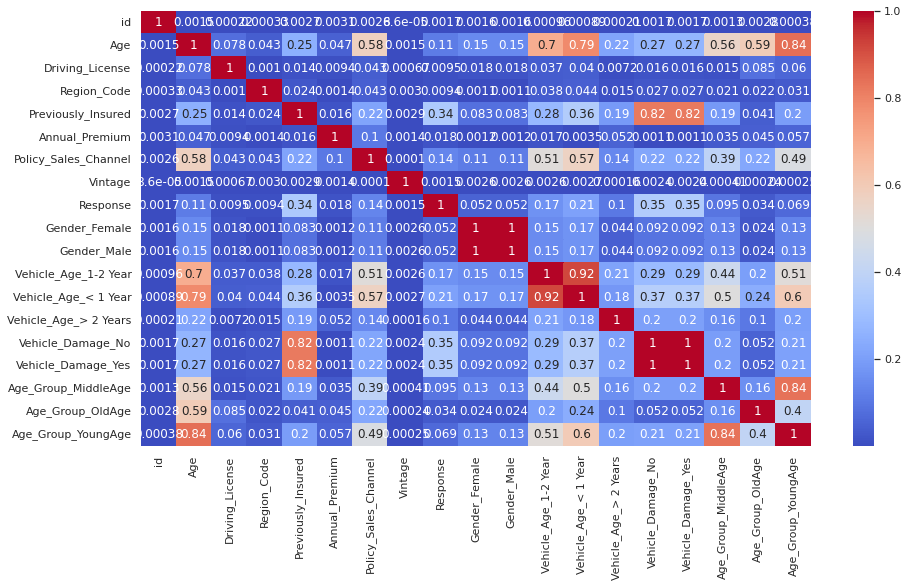

In [115]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [117]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Female,inf
9,Gender_Male,inf


In [118]:
df1.drop(columns = (['Gender_Female']) , inplace =True)

In [119]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,inf


In [120]:
df1.drop(columns = (['Vehicle_Age_> 2 Years']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])


,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,6.967449


In [121]:

df1.drop(columns = (['Vehicle_Damage_No']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,1.000037
1,Age,11.921850
2,Driving_License,1.009105
3,Region_Code,1.002771
4,Previously_Insured,3.143413
5,Annual_Premium,1.020819
6,Policy_Sales_Channel,1.615747
7,Vintage,1.000038
8,Gender_Male,1.033581
9,Vehicle_Age_1-2 Year,6.967449


In [122]:
df1.drop(columns = (['Age_Group_YoungAge']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.980635
1,Age,74.061556
2,Driving_License,112.909073
3,Region_Code,4.922475
4,Previously_Insured,5.758097
5,Annual_Premium,5.027569
6,Policy_Sales_Channel,8.466034
7,Vintage,4.378938
8,Gender_Male,2.242046
9,Vehicle_Age_1-2 Year,13.827063


In [123]:
df1.drop(columns = (['Driving_License']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.919174
1,Age,37.296765
2,Region_Code,4.815570
3,Previously_Insured,5.543370
4,Annual_Premium,4.890389
5,Policy_Sales_Channel,7.782770
6,Vintage,4.300270
7,Gender_Male,2.231319
8,Vehicle_Age_1-2 Year,11.398519
9,Vehicle_Age_< 1 Year,9.848694


In [124]:
df1.drop(columns = (['Age']) , inplace =True)
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,id,3.813963
1,Region_Code,4.618183
2,Previously_Insured,5.179191
3,Annual_Premium,4.641786
4,Policy_Sales_Channel,7.620972
5,Vintage,4.168117
6,Gender_Male,2.195216
7,Vehicle_Age_1-2 Year,8.258193
8,Vehicle_Age_< 1 Year,9.636010
9,Vehicle_Damage_Yes,5.198081


In [125]:
df1.drop(columns = (['id']), inplace =  True)

In [126]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Response']]])

,variables,VIF
0,Region_Code,4.602241
1,Previously_Insured,5.145967
2,Annual_Premium,4.619124
3,Policy_Sales_Channel,7.583373
4,Vintage,4.156789
5,Gender_Male,2.192477
6,Vehicle_Age_1-2 Year,7.950969
7,Vehicle_Age_< 1 Year,9.348067
8,Vehicle_Damage_Yes,5.138677
9,Age_Group_MiddleAge,1.942766


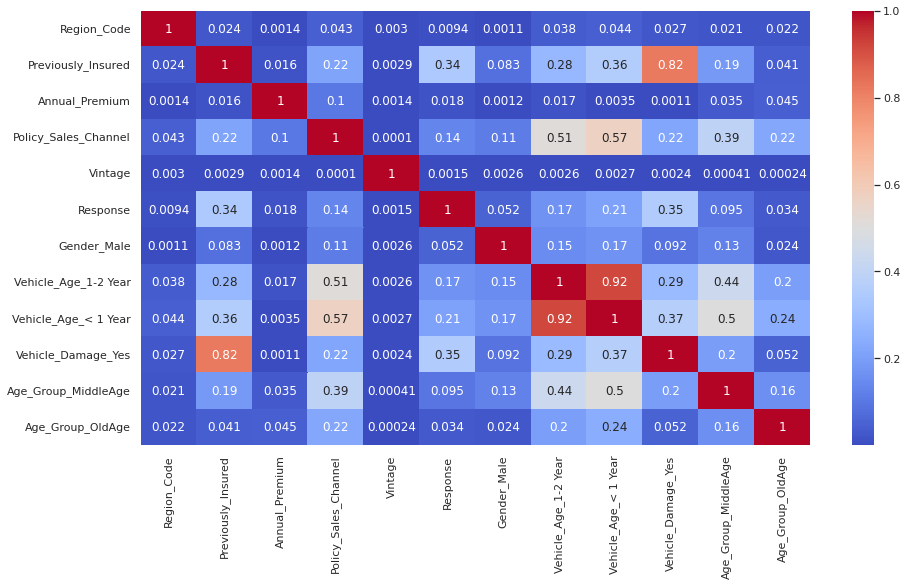

In [127]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [128]:
# Creating the data of independent variables
y = df1['Response']

# Create the dependent variable data
X = df1.drop(columns=['Response'],axis=1).values

Text(0.5, 1.0, 'Response')

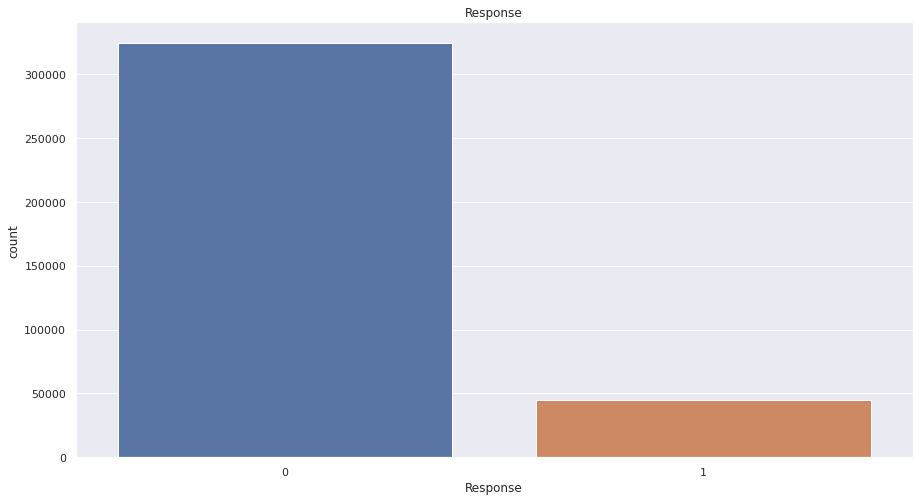

In [129]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x=df['Response'])
plt.title('Response')

***From this plot, it is evident that there is class imbalance i.e, the number of values of 0 are greater than 1. This might hinder the accuracy of ML models so we implement resampling to alleviate it***.

Original dataset shape Counter({0: 324161, 1: 44876})
Resampled dataset shape Counter({1: 324161, 0: 324161})


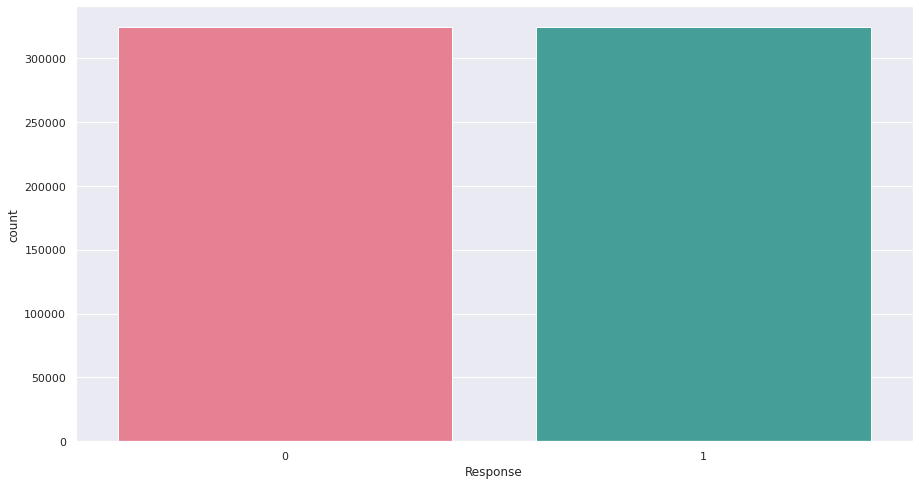

In [130]:
from imblearn.over_sampling import RandomOverSampler
randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')
     

In [131]:
#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(453825, 11) (194497, 11) (453825,) (194497,)


In [132]:
model=LogisticRegression()
model=model.fit(X_train,y_train)
pred=model.predict(X_test)
lr_probability =model.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.784397702792331
ROC_AUC Score: 0.8299374732237534


In [133]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.60      0.95      0.73     60873
           1       0.97      0.71      0.82    133624

    accuracy                           0.78    194497
   macro avg       0.78      0.83      0.78    194497
weighted avg       0.85      0.78      0.79    194497



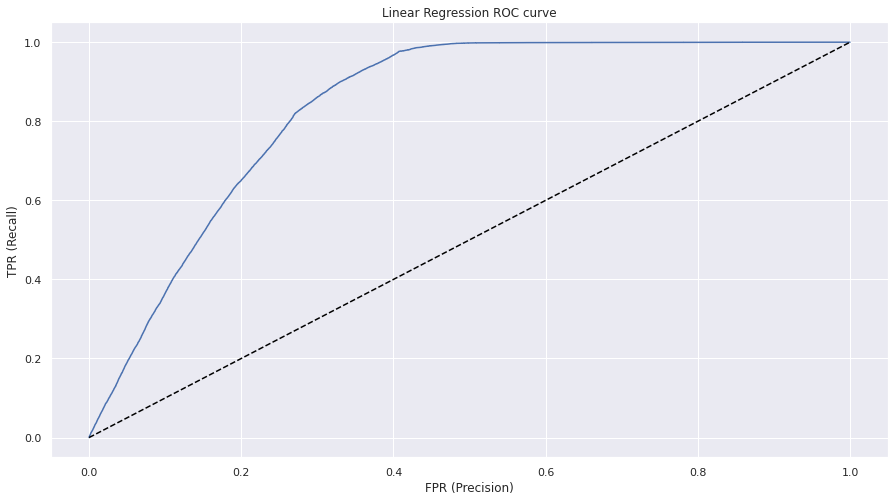

In [86]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[59934 39797]
 [ 3333 96655]]


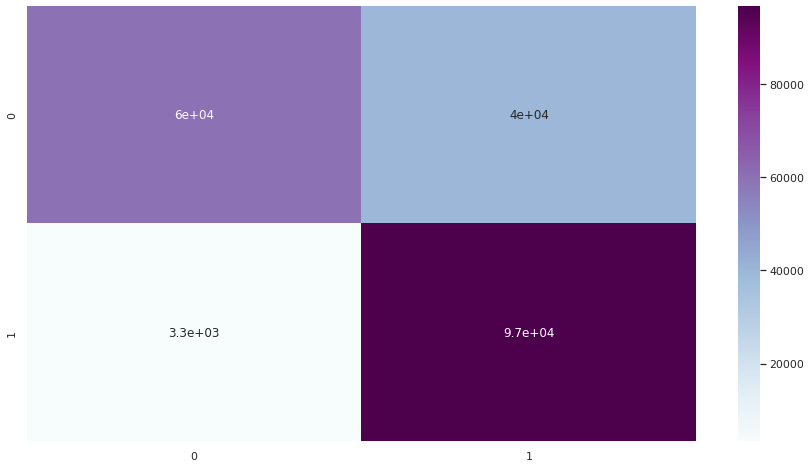

In [87]:

cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

In [88]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print(accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.9342376038333859
ROC_AUC Score: 0.9410843658550333


In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93     87345
           1       1.00      0.89      0.94    112374

    accuracy                           0.93    199719
   macro avg       0.93      0.94      0.93    199719
weighted avg       0.94      0.93      0.93    199719



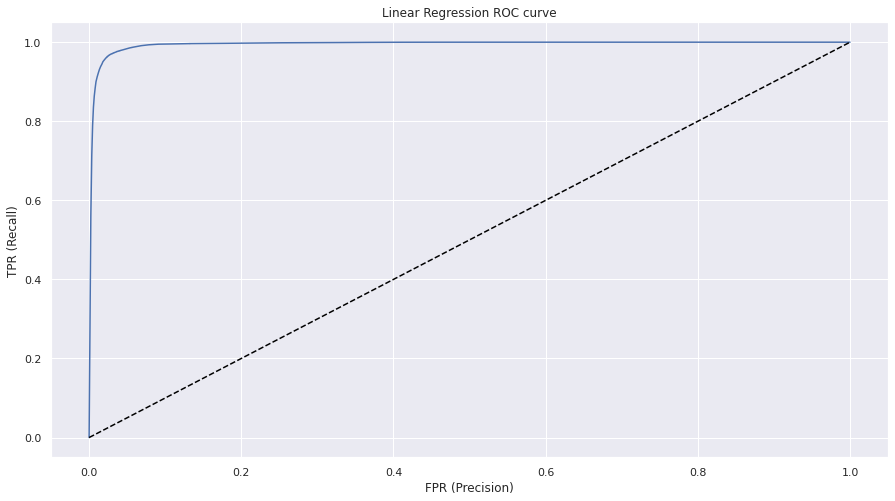

In [91]:

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
     

[[86971   374]
 [12760 99614]]


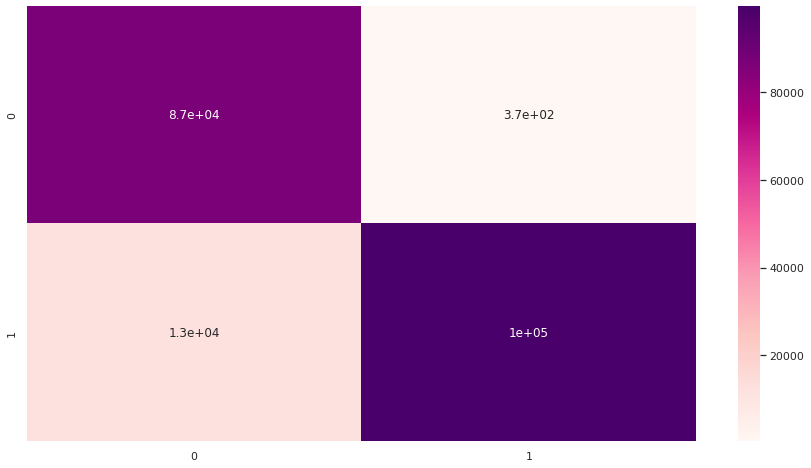

In [92]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

In [136]:

from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.798310513786845
ROC_AUC Score: 0.8281112492026922


In [137]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.65      0.93      0.76     67693
           1       0.95      0.73      0.83    126804

    accuracy                           0.80    194497
   macro avg       0.80      0.83      0.79    194497
weighted avg       0.84      0.80      0.80    194497



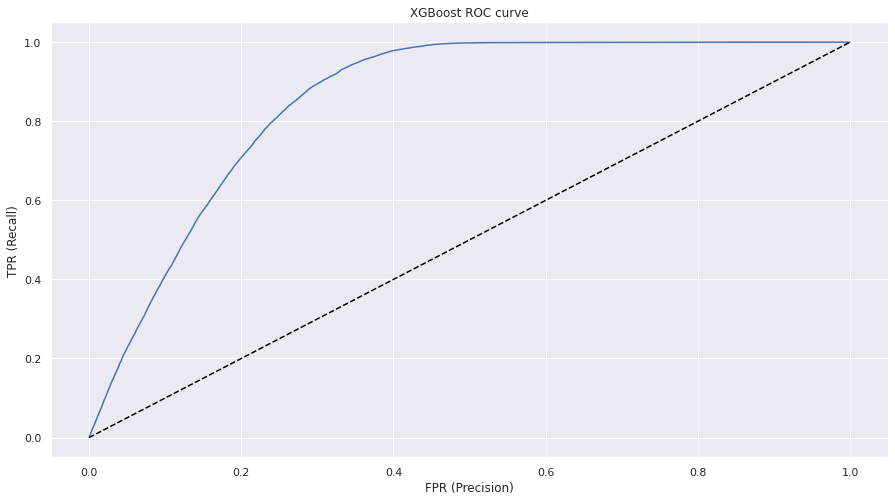

In [138]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
     

[[62695 34230]
 [ 4998 92574]]


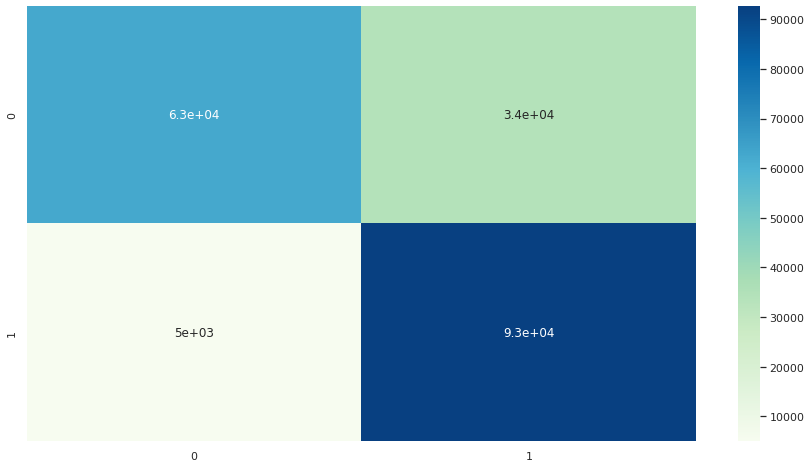

In [139]:

#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

In [ ]:
#dividing the dataset into training and testing
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(466011, 11) (199719, 11) (466011,) (199719,)


In [ ]:
# training the mdoel

from sklearn.naive_bayes import MultinomialNB
sentiment_model = MultinomialNB().fit(X_train,y_train)

predictions_test = sentiment_model.predict(X_test)
predictions_train = sentiment_model.predict(X_train)
acc_naive=accuracy_score(y_test,y_predict)
recall_naive=recall_score(y_test,y_predict)
precision_naive=precision_score(y_test,y_predict)
f1score_naive=f1_score(y_test,y_predict)

AUC_naive=roc_auc_score(y_predict,y_test)


print(accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_naive)

0.7973652982440329
ROC_AUC Score: 0.8271308777160167


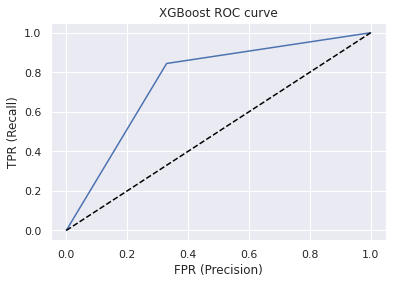

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, predictions_test)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[155983  36270]
 [ 77151 196607]]


[Text(0, 0.5, 'positive'), Text(0, 1.5, 'negative')]

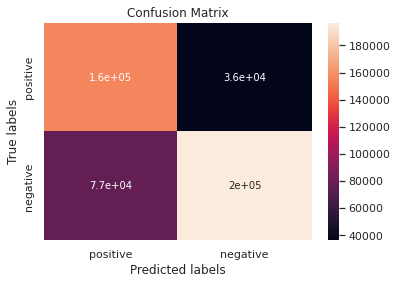

In [ ]:
# getting train set confusion matrix

labels = ['positive','negative']
cm_test = confusion_matrix(predictions_train,y_train)
print(cm_test)

ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


In [ ]:

# Print the classification report for train and test

print('Train set report')
print("\n")
print(classification_report(y_train,predictions_train))
print("\n")
print('Test set report')
print("\n")
print(classification_report(y_test,predictions_test))


Train set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.73    233134
           1       0.72      0.84      0.78    232877

    accuracy                           0.76    466011
   macro avg       0.76      0.76      0.75    466011
weighted avg       0.76      0.76      0.75    466011



Test set report


              precision    recall  f1-score   support

           0       0.81      0.67      0.73     99731
           1       0.72      0.84      0.78     99988

    accuracy                           0.76    199719
   macro avg       0.77      0.76      0.76    199719
weighted avg       0.77      0.76      0.76    199719

